In [1]:
import mysql.connector
import pandas as pd
import numpy as np  
from matplotlib import pyplot as plt
import seaborn as sns
import json

mydb = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Mala2ki7!",
    database="userDBnew"
)

df = pd.read_sql('SELECT * FROM reaction_info', con=mydb)

users=[98, 133, 140, 161, 168, 175, 182, 189, 196, 203, 224, 231, 238, 245, 252, 259]
df = df[df["id"].isin(users)].drop_duplicates()

question_columns = list(df.columns[4:-2])
columns = list(df.columns)
columns

['id', 'switch_type', 'srt', 'dpt']

In [2]:
df["avg_srt"] = np.nan
df["avg_dpt"] = np.nan
for id in list(set(df.id)):
    for switch_type in list(set(df[df.id == id].switch_type)):
        srts = json.loads(df[(df.id == id) & (df.switch_type == switch_type)].srt.values[0])
        dpts = json.loads(df[(df.id == id) & (df.switch_type == switch_type)].dpt.values[0])
        
        df.loc[(df.id == id) & (df.switch_type == switch_type), 'avg_srt'] = np.median(srts[1:])
        df.loc[(df.id == id) & (df.switch_type == switch_type), 'avg_dpt'] = np.median(dpts[1:])
df = df.replace({'motion': 'webcam'})
df = df.replace({'face': 'webcam'})


In [3]:
koester_df = pd.read_excel('D:/Users/nickb/PycharmProjectsD/NomonWeb/data_processing/AB_study/koester_data.xlsx')
koester_srts = koester_df[koester_df.phase == 1]["avgResponseTime"].values
koester_dpts = (koester_df[koester_df.phase == 2]["avgTrialTime"] - koester_df[koester_df.phase == 2]["avgResponseTime"]).values
koester_mi = koester_df[koester_df.phase == 1]["MI"].values

koester_df = pd.DataFrame(np.vstack([koester_srts, koester_dpts, koester_mi]).T, columns=["SRT", "DPT", "MI"])

c:\users\nickb\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\nickb\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\nickb\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

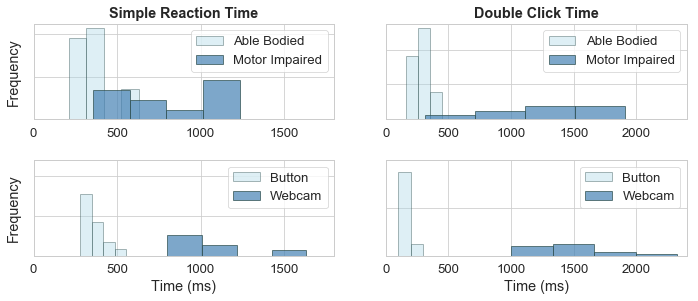

In [17]:
sns.set_context("paper", font_scale=1.5)
sns.set_style("whitegrid")
fig, ((ax_top_left, ax_top_right),(ax_bottom_left, ax_bottom_right)) = plt.subplots(nrows=2, ncols=2, figsize=(10, 4))
fig.tight_layout()
# sns.set_palette(sns.color_palette("Paired"))
sns.set_palette(["lightblue", "steelblue"])

# srts
sns.distplot(koester_df[koester_df.MI ==  0].SRT, bins=4, kde=False, norm_hist=True, ax=ax_top_left, label="Able Bodied",
             hist_kws=dict(edgecolor="darkslategrey", linewidth=1))
sns.distplot(koester_df[koester_df.MI ==  1].SRT, bins=4, kde=False, norm_hist=True, ax=ax_top_left, label="Motor Impaired",
             hist_kws=dict(edgecolor="darkslategrey", linewidth=1, alpha=.7))
ax_top_left.set_xlim(0, 1800)
ax_top_left.set_yticklabels([])
ax_top_left.set_xlabel('')
ax_top_left.set_ylabel('Frequency')
ax_top_left.legend()
ax_top_left.set_title("Simple Reaction Time", fontweight="bold")

sns.distplot(df[df.switch_type == "button"].avg_srt, bins=4, kde=False, norm_hist=True, ax=ax_bottom_left, label="Button",
             hist_kws=dict(edgecolor="darkslategrey", linewidth=1))
sns.distplot(df[df.switch_type == "webcam"].avg_srt, bins=14, kde=False, norm_hist=True, ax=ax_bottom_left, label="Webcam",
             hist_kws=dict(edgecolor="darkslategrey", linewidth=1, alpha=.7))
ax_bottom_left.set_xlim(0, 1800)
ax_bottom_left.set_ylim(0, 0.012)
ax_bottom_left.set_yticklabels([])
ax_bottom_left.set_xlabel('Time (ms)')
ax_bottom_left.set_ylabel('Frequency')
ax_bottom_left.legend()

# dpts
sns.distplot(koester_df[koester_df.MI ==  0].DPT, bins=3, kde=False, norm_hist=True, ax=ax_top_right, label="Able Bodied",
             hist_kws=dict(edgecolor="darkslategrey", linewidth=1))
sns.distplot(koester_df[koester_df.MI ==  1].DPT, bins=9, kde=False, norm_hist=True, ax=ax_top_right, label="Motor Impaired",
             hist_kws=dict(edgecolor="darkslategrey", linewidth=1, alpha=.7))
ax_top_right.set_xlim(0, 2400)
ax_top_right.set_yticklabels([])
ax_top_right.set_xlabel('')
ax_top_right.legend()
ax_top_right.set_title("Double Click Time", fontweight="bold")

sns.distplot(df[df.switch_type == "button"].avg_dpt, bins=range(100, 400, 100), kde=False, norm_hist=True, ax=ax_bottom_right, label="Button",
             hist_kws=dict(edgecolor="darkslategrey", linewidth=1))
sns.distplot(df[df.switch_type == "webcam"].avg_dpt, bins=12, kde=False, norm_hist=True, ax=ax_bottom_right, label="Webcam",
             hist_kws=dict(edgecolor="darkslategrey", linewidth=1, alpha=.7))
ax_bottom_right.set_xlim(0, 2400)
ax_bottom_right.set_ylim(0, 0.01)
ax_bottom_right.set_yticklabels([])
ax_bottom_right.set_xlabel('Time (ms)')
ax_bottom_right.legend()

plt.savefig("D:/Users/nickb/PycharmProjectsD/NomonWeb/data_processing/AB_study/figures/reaction_times.png", dpi=600)

In [22]:
print("NMI DPT MEAN: ", np.mean(koester_df[koester_df.MI ==  0].DPT.values))
print("BUTTON DPT MEAN: ", np.mean(df[df.switch_type == "button"].avg_dpt), "\n")

print("MI DPT MEAN: ", np.mean(koester_df[koester_df.MI ==  1].DPT.values))
print("WEBCAM DPT MEAN: ", np.mean(df[df.switch_type == "webcam"].avg_dpt), "\n")

print("NMI SRT MEAN: ", np.mean(koester_df[koester_df.MI ==  0].SRT.values))
print("BUTTON SRT MEAN: ", np.mean(df[df.switch_type == "button"].avg_srt), "\n")

print("MI SRT MEAN: ", np.mean(koester_df[koester_df.MI ==  1].SRT.values))
print("WEBCAM SRT MEAN: ", np.mean(df[df.switch_type == "webcam"].avg_srt), "\n")


NMI DPT MEAN:  289.19
BUTTON DPT MEAN:  174.88235294117646 

MI DPT MEAN:  1463.075
WEBCAM DPT MEAN:  1669.9333333333334 

NMI SRT MEAN:  355.52
BUTTON SRT MEAN:  365.0 

MI SRT MEAN:  821.5925
WEBCAM SRT MEAN:  1215.3333333333333 

